# Tensor Decomposition of Spatial Features

**Author**: Clarence Mah<br>
**Last Updated**: 6/5/2022

Here we will demonstrate how to use tensor decomposition to generate low dimensional signatures with `bento`. We will use the included seqFISH+ dataset.

## Load Libraries

In [1]:
import bento

## Load Data

Let's start with the preprocessed seqFISH+ data.

In [2]:
# Load precomputed features
adata = bento.datasets.load_dataset('seqfish')

In [3]:
adata.layers

Layers with keys: cell_edge, cell_edge_p, cell_inner_asymmetry, cell_inner_proximity, cell_outer_asymmetry, cell_outer_proximity, cytoplasmic, cytoplasmic_p, l_half_radius, l_max, l_max_gradient, l_min_gradient, l_monotony, none, none_p, nuclear, nuclear_edge, nuclear_edge_p, nuclear_p, nucleus_dispersion, nucleus_inner_asymmetry, nucleus_inner_edge_enrichment, nucleus_inner_proximity, nucleus_outer_asymmetry, nucleus_outer_edge_enrichment, nucleus_outer_proximity, point_dispersion, spliced, unspliced

## Tensor Rank Estimation
First we will determine the number of factors used to represent our dataset. To do so, we will perform tensor decomposition for a range of values and calculate the reconstruction loss with the original tensor at each value. Reconstruction accuracy across range of decomposition ranks (1 is perfect, 0 is noise). The best rank is highlighted in red as determined by the elbow method.

<div class="alert alert-info">

Note

Estimating rank can be difficult; here we are using a heuristic and therefore may not generalize perfectly to a different dataset. Try increasing the `upper_rank` if the error does not flatten, or increasing `runs` if the confidence interval is too wide.

</div>

In [4]:
layers = [
    "cell_inner_proximity",
    "nucleus_inner_proximity",
    "nucleus_outer_proximity",
    "l_half_radius",
    "l_max",
    "l_max_gradient",
    "l_min_gradient",
    "l_monotony",
    "cell_inner_asymmetry",
    "nucleus_inner_asymmetry",
    "nucleus_outer_asymmetry",
    "point_dispersion",
    "nucleus_dispersion",
]

Device: cpu


  0%|          | 0/10 [00:00<?, ?it/s]

The rank at the elbow is: None


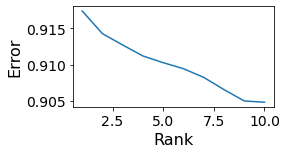

In [6]:
bento.tl.select_tensor_rank(
    adata,
    layers=layers,
    upper_rank=10,
    runs=1
)

<div class="alert alert-info">

Note

GPU Support: Tensor decomposition runs much faster on the GPU. See `bento` installation instructions to see how you can take advantage of this and compute signatures much more efficiently.

</div>

## Generate signatures with tensor decomposition

`Bento` is able to utilize these feature spaces for predicting RNA localization patterns (see the "Subcellular Localization" tutorial). For unsupervised analysis, `Bento` implements tensor decomposition to generate interpretable low dimensional signatures.

In [7]:
bento.tl.decompose_tensor(
    adata,
    layers,
    9,
)

Device: cpu


Visualize the signature loadings.

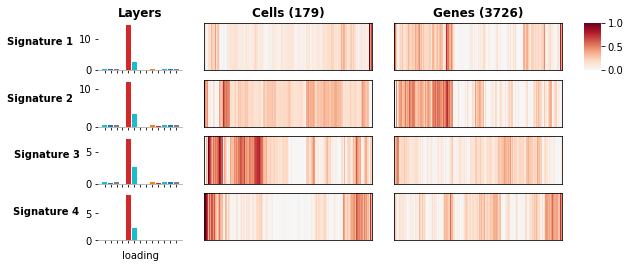

In [8]:
bento.pl.lp_signatures(adata)

Plot the top genes and cells for each signature.

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

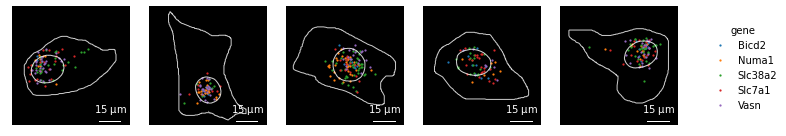

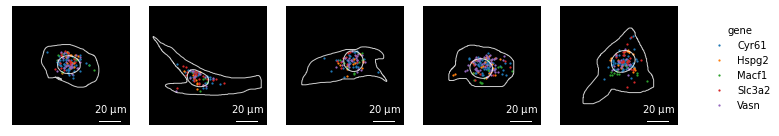

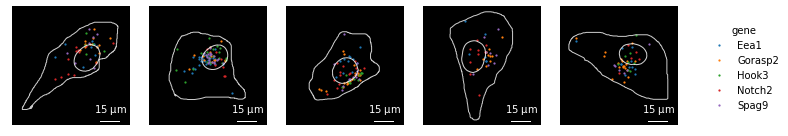

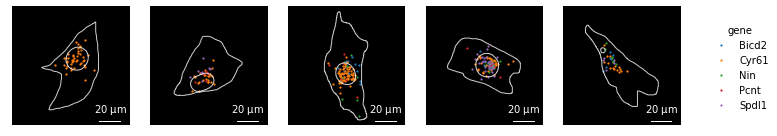

In [9]:
bento.pl.sig_samples(adata)